# Explore the Votes Counter

In [1]:
import matplotlib.pyplot as plt
from glob import glob
from skimage.transform import resize
import numpy as np
%matplotlib inline

In [2]:
def imcrop_tosquare(img):
    """Make any image a square image.
    Parameters
    ----------
    img : np.ndarray
        Input image to crop, assumed at least 2d.
    Returns
    -------
    crop : np.ndarray
        Cropped image.
    """
    size = np.min(img.shape[:2])
    extra = img.shape[:2] - size
    crop = img
    for i in np.flatnonzero(extra):
        crop = np.take(crop, extra[i] // 2 + np.r_[:size], axis=i)
    return crop


def read_files_as_numpy(filenames_list:list, samples:int):
    """Read the images from disk and outputs this as numpy array

    Parameters
    ----------
    filenames_list : python list with image names.
    
    samples : int
         How many samples to take?

    Returns
    -------
    m : numpy.ndarray
        Montage image.
    """
    # Read every filename as an RGB image
    imgs = [plt.imread(fname)[..., :3] for fname in filenames_list[:samples]]

    # Crop every image to a square
    imgs_or = [imcrop_tosquare(img_i) for img_i in imgs]

    # Then resize the square image to 100 x 100 pixels
    imgs = [resize(img_i, (100, 100)) for img_i in imgs_or]

    # Finally make our list of 3-D images a 4-D array with the first dimension the number of images:
    imgs_4d = np.array(imgs).astype(np.float32)
   
    return imgs_4d

In [3]:
def montage(images, saveto='montage.png'):
    """Draw all images as a montage separated by 1 pixel borders.

    Also saves the file to the destination specified by `saveto`.

    Parameters
    ----------
    images : numpy.ndarray
        Input array to create montage of.  Array should be:
        batch x height x width x channels.
    saveto : str
        Location to save the resulting montage image.

    Returns
    -------
    m : numpy.ndarray
        Montage image.
    """
    if isinstance(images, list):
        images = np.array(images)
    img_h = images.shape[1]
    img_w = images.shape[2]
    n_plots = int(np.ceil(np.sqrt(images.shape[0])))
    if len(images.shape) == 4 and images.shape[3] == 3:
        m = np.ones(
            (images.shape[1] * n_plots + n_plots + 1,
             images.shape[2] * n_plots + n_plots + 1, 3)) * 0.5
    else:
        m = np.ones(
            (images.shape[1] * n_plots + n_plots + 1,
             images.shape[2] * n_plots + n_plots + 1)) * 0.5
    for i in range(n_plots):
        for j in range(n_plots):
            this_filter = i * n_plots + j
            if this_filter < images.shape[0]:
                this_img = images[this_filter]
                m[1 + i + i * img_h:1 + i + (i + 1) * img_h,
                  1 + j + j * img_w:1 + j + (j + 1) * img_w] = this_img
    plt.imsave(arr=m, fname=saveto)
    return m

In [4]:
counted_votes = glob("./results/counts/*.jpg")

print("TOTAL IMAGES:", len(counted_votes))

TOTAL IMAGES: 5


In [8]:
images_4d = read_files_as_numpy(filenames_list = counted_votes, samples = 5)

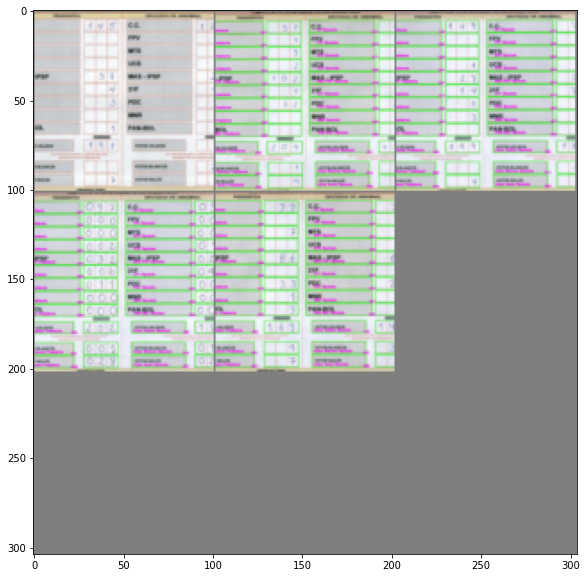

In [9]:
# Plot the resulting dataset:

# Make sure we have a 16 x 100 x 100 x 3 dimension array

assert(images_4d.shape == (5, 100, 100, 3))

plt.figure(figsize=(10, 10))
plt.imshow(montage(images_4d, saveto='counted_votes_collage.png'))